In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cf
from read_data.tmi_daily_v7 import TMIdaily

In [9]:
# 設置範圍和參數
time = '20101022'
dtype = "test_data"
data_file = f'{dtype}/f12_{time}v7.1.gz'
lat_min, lat_max = 10, 25
lon_min, lon_max = 108, 124
output_folder = "tmi_images"
os.makedirs(output_folder, exist_ok=True)

In [10]:
dataset = TMIdaily(data_file)
# read variables
sst = dataset.variables['sst']
lat = dataset.variables['latitude']
lon = dataset.variables['longitude']
# 过滤无效值
sst = np.where(sst >= 251, np.nan, sst)
# 合成
sst_composite = np.nanmean(sst, axis=0)

data = sst_composite

/var/folders/lx/4bn5cmyn63b1p7gtb6m71jch0000gn/T/ipykernel_1292/3396305350.py:9: RuntimeWarning: Mean of empty slice
  sst_composite = np.nanmean(sst, axis=0)


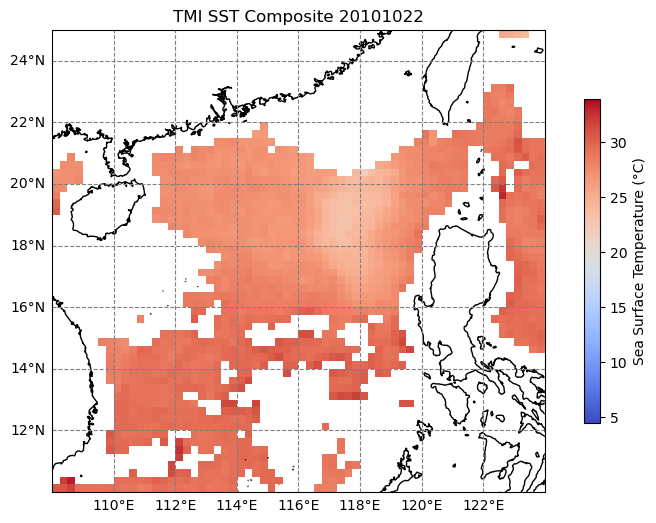

In [16]:
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
ax.add_feature(cf.COASTLINE)
ax.add_feature(cf.BORDERS, linestyle=':')

# 創建經緯度網格
lon_grid, lat_grid = np.meshgrid(lon, lat)
# 計算顏色條的範圍
sst_min, sst_max = np.nanmin(data), np.nanmax(data)
# 繪製 SST 圖像
sst_plot = ax.pcolormesh(lon_grid, lat_grid, sst_composite, cmap='coolwarm', 
                         transform=ccrs.PlateCarree(), vmin=sst_min, vmax=sst_max)

# 添加經緯度刻度
gl = ax.gridlines(draw_labels=True, crs=ccrs.PlateCarree(), linestyle="--", color="gray")
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 10, 'color': 'black'}
gl.ylabel_style = {'size': 10, 'color': 'black'}
    
# 設置顏色條
cbar = plt.colorbar(sst_plot, ax=ax, orientation='vertical', shrink=0.7, pad=0.05)
cbar.set_label('Sea Surface Temperature (°C)')

# 設置標題和保存圖像
plt.title(f'TMI SST Composite {time}')
plt.savefig(os.path.join(output_folder, f'TMI SST Composite {time}.png'), bbox_inches='tight')
plt.show()